# **Data Analysis**

Setelah data dipersiapkan, analisis dapat dimulai untuk mengevaluasi kinerja kampanye sebelumnya dari SUPER-MART. Selanjutnya, kami juga akan mempelajari perilaku pelanggan berdasarkan karakteristik demografis. Terakhir, kami akan mengeksplorasi peluang potensial yang dapat dimaksimalkan oleh SUPER-MART dalam merancang kampanye pemasaran berikutnya.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn_extra.cluster import KMedoids
import squarify
import scipy.stats as ss
import missingno as msn
import math
import warnings
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LinearRegression
pd.options.display.max_columns=40
warnings.filterwarnings("ignore", category=FutureWarning)

In [16]:
df=pd.read_csv('Cleaned_Supermarket_Customers.csv')
df=df.drop(columns=['Unnamed: 0'])
df

,ID,Year_Birth,Generation,Education,Income,IncomeClass,Marital_Status,Adulthome,Kidhome,Teenhome,FamilySize,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Response,Dt_Customer,Complain,preferredPlatform,Recency,Frequency,Monetary
0,5524,1957,Baby Boomers,Undergraduate,58138.0,Middle Class,Single,1,0,0,1,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012-09-04,0,Catalog,58,25,1617
1,2174,1954,Baby Boomers,Undergraduate,46344.0,Lower Middle Class,Single,1,1,1,3,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014-03-08,0,Store,38,6,27
2,4141,1965,Gen X,Undergraduate,71613.0,Middle Class,Partnered,2,0,0,2,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013-08-21,0,Store,26,21,776
3,6182,1984,Millennials,Undergraduate,26646.0,Lower Class,Partnered,2,1,0,3,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014-02-10,0,Store,26,8,53
4,5324,1981,Millennials,PhD,58293.0,Middle Class,Partnered,2,1,0,3,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014-01-19,0,Store,94,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,8080,1986,Millennials,Undergraduate,26816.0,Lower Class,Single,1,0,0,1,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,2012-08-17,0,Store,50,4,22
2019,10870,1967,Gen X,Undergraduate,61223.0,Middle Class,Partnered,2,0,1,3,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,2013-06-13,0,Web,46,18,1341
2020,7270,1981,Millennials,Undergraduate,56981.0,Lower Middle Class,Single,1,0,0,1,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,1,0,2014-01-25,0,Store,91,19,1241
2021,8235,1956,Baby Boomers,Postgraduate,69245.0,Middle Class,Partnered,2,0,1,3,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,2014-01-24,0,Store,8,23,843


In [30]:
#Klasifikasi jenis tipe kolom data
categorical_columns = ['Education', 'Marital_Status','IncomeClass','Generation','preferredPlatform','FamilySize']

binary_columns = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

numerical_columns = ['Income', 'FamilySize', 
                     'Recency','Frequency','Monetary', 
                     'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

datetime_columns = ["Dt_Customer"]

## Problem 1: Seperti apa demografi dan preferensi tiap segment customer untuk menyempurnakan strategi pemasaran yang tepat dan mendorong pengalaman belanja yang personal? 

Dalam upaya menyempurnakan strategi pemasaran dan mendorong pengalaman belanja yang lebih personal, analisis visualisasi data dari demografi dan preferensi tiap segmen pelanggan memberikan wawasan yang berharga. Dengan memahami distribusi pendidikan, generasi, kelas pendapatan, status pernikahan, platform belanja, dan ukuran keluarga, kita dapat menargetkan kampanye pemasaran secara lebih efektif dan menawarkan pengalaman belanja yang disesuaikan dengan kebutuhan setiap segmen pelanggan.

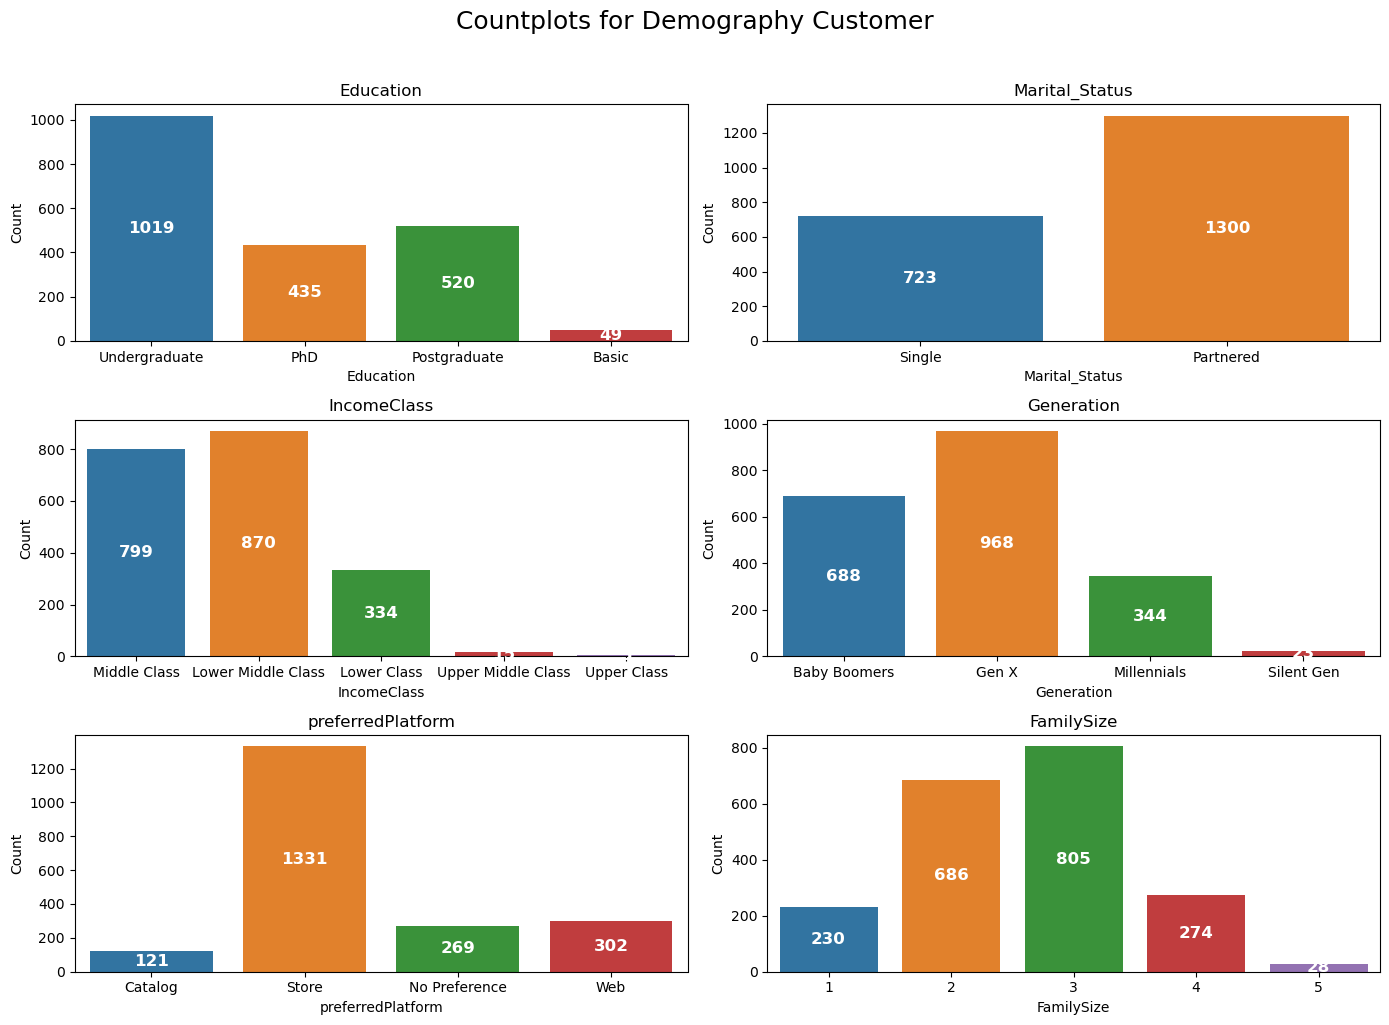

In [31]:
cat_cols = categorical_columns.copy()
plt.figure(figsize=(14, 10))
n = 3
for i, column in enumerate(cat_cols):
    plt.subplot(n, math.ceil(len(cat_cols) / n), i + 1)
    bar_plot = sns.countplot(x=column, data=df, palette='tab10')
    plt.title(column)
    plt.ylabel('Count')
    # Adding annotations
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.text(p.get_x() + p.get_width() / 2.,height / 2,f'{int(height)}',ha="center",va='center',color='white',fontsize=12,weight='bold')

plt.suptitle('Countplots for Demography Customer', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

### Insight terhadap Demography Customer

#### 1. Education
- **Observasi**: Sebagian besar pelanggan memiliki pendidikan "Undergraduate", diikuti oleh "PhD", "PostGraduate", dan "Basic". Pelanggan dengan pendidikan sarjana (Undergraduate) adalah kelompok terbesar, menunjukkan bahwa kampanye pemasaran yang menargetkan kelompok ini bisa lebih efektif.

#### 2. Generation
- **Observasi**: Generasi yang paling banyak diwakili adalah "Gen X", diikuti oleh "Millennials", "Baby Boomers", dan "Silent Gen". Kampanye pemasaran yang berfokus pada Gen X dan Millennials mungkin lebih berhasil karena mereka merupakan kelompok terbesar dalam dataset ini.

#### 3. IncomeClass
- **Observasi**: Mayoritas pelanggan termasuk dalam "Middle Class", diikuti oleh "Lower Middle Class", "Upper Middle Class", "Lower Class", dan "Upper Class". Menargetkan kampanye pada pelanggan kelas menengah dapat memberikan dampak terbesar, tetapi penting juga untuk mempertimbangkan segmentasi lebih lanjut untuk kelas lainnya.

#### 4. Marital_Status
- **Observasi**: Sebagian besar pelanggan berstatus "Partnered", diikuti oleh "Single", "Divorced", dan "Widowed". Kampanye pemasaran yang ditargetkan pada pasangan (Partnered) mungkin lebih efektif. Produk atau layanan yang menarik untuk rumah tangga juga bisa menjadi fokus.

#### 5. Preferred Platform
- **Observasi**: Mayoritas pelanggan lebih suka berbelanja di "Store", diikuti oleh "Web" dan "Catalog". Fokus pada pengalaman berbelanja di toko fisik bisa memberikan dampak besar. Namun, meningkatkan pengalaman berbelanja online dan melalui katalog juga bisa membuka peluang tambahan.

#### 6. Family Size
- **Observasi**: Mayoritas pelanggan memiliki jumlah anggota keluarga berjumlah 3 hingga 2 perkeluarga. Produk dalam ukuran kemasan untuk keluarga kecil akan menarik lebih banyak pelanggan dibandingkan ukuran personal.

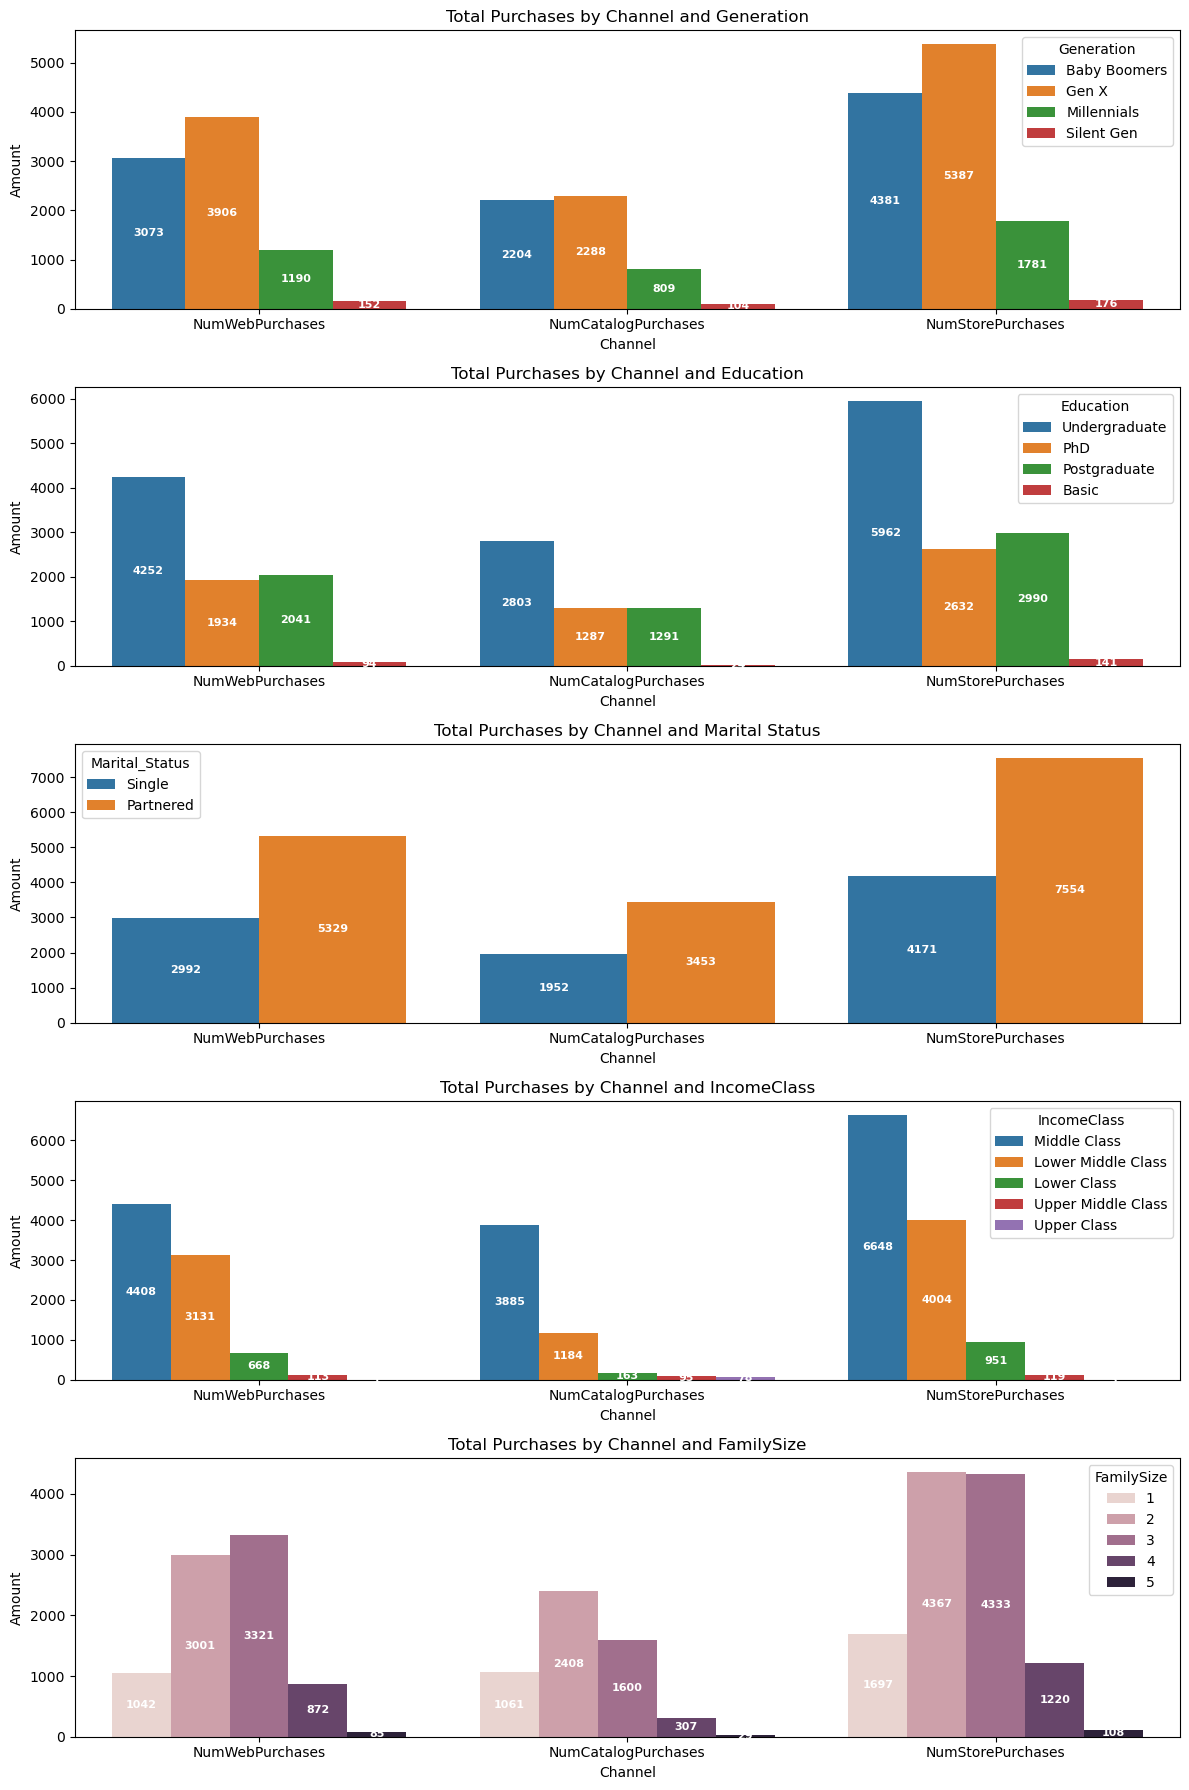

In [32]:
df_channels = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Generation', 'Education', 'Marital_Status','IncomeClass','FamilySize']]

df_channels_melted = df_channels.melt(id_vars=['Generation', 'Education', 'Marital_Status','IncomeClass','FamilySize'], 
                                      value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], 
                                      var_name='Channel', 
                                      value_name='Amount')

# Create a 4x1 figure for plotting
fig, axes = plt.subplots(5, 1, figsize=(12, 18))

# Plot with hue 'Generation'
sns.barplot(ax=axes[0], data=df_channels_melted, x='Channel', y='Amount', hue='Generation', ci=0, estimator=np.sum)
axes[0].set_title('Total Purchases by Channel and Generation')
for p in axes[0].patches:
    width, height = p.get_width(), round(p.get_height())
    x, y = p.get_xy()
    if height != 0:
        axes[0].annotate(f'{height}', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Plot with hue 'Education'
sns.barplot(ax=axes[1], data=df_channels_melted, x='Channel', y='Amount', hue='Education', ci=0, estimator=np.sum)
axes[1].set_title('Total Purchases by Channel and Education')
for p in axes[1].patches:
    width, height = p.get_width(), round(p.get_height())
    x, y = p.get_xy()
    if height != 0:
        axes[1].annotate(f'{height}', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Plot with hue 'Marital_Status'
sns.barplot(ax=axes[2], data=df_channels_melted, x='Channel', y='Amount', hue='Marital_Status', ci=0, estimator=np.sum)
axes[2].set_title('Total Purchases by Channel and Marital Status')
for p in axes[2].patches:
    width, height = p.get_width(), round(p.get_height())
    x, y = p.get_xy()
    if height != 0:
        axes[2].annotate(f'{height}', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=8, color='white', fontweight='bold')

# Plot with hue 'Income Class'
sns.barplot(ax=axes[3], data=df_channels_melted, x='Channel', y='Amount', hue='IncomeClass', ci=0, estimator=np.sum)
axes[3].set_title('Total Purchases by Channel and IncomeClass')
for p in axes[3].patches:
    width, height = p.get_width(), round(p.get_height())
    x, y = p.get_xy()
    if height != 0:
        axes[3].annotate(f'{height}', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=8, color='white', fontweight='bold')


# Plot with hue 'Income Class'
sns.barplot(ax=axes[4], data=df_channels_melted, x='Channel', y='Amount', hue='FamilySize', ci=0, estimator=np.sum)
axes[4].set_title('Total Purchases by Channel and FamilySize')
for p in axes[4].patches:
    width, height = p.get_width(), round(p.get_height())
    x, y = p.get_xy()
    if height != 0:
        axes[4].annotate(f'{height}', (x + width / 2, y + height / 2),
                         ha='center', va='center', fontsize=8, color='white', fontweight='bold')
        
plt.tight_layout()
plt.show()

### Insight Point of Sales terhadap Demografi Customer

#### 1. Total Purchases by Channel and Generation
- **Observasi**: 
  - Generasi X melakukan pembelian terbanyak di semua saluran (Web, Katalog, dan Toko). Generasi Millennial juga menunjukkan angka pembelian yang signifikan, terutama di toko fisik. Generasi Baby Boomers melakukan pembelian yang lebih sedikit dibandingkan Gen X dan Millennial.

  - Kampanye pemasaran yang menargetkan Gen X dan Millennial kemungkinan akan lebih efektif, terutama di toko fisik. Perusahaan dapat meningkatkan promosi online untuk menjangkau lebih banyak pelanggan dari Generasi Millennial dan Baby Boomers.

#### 2. Total Purchases by Channel and Education
- **Observasi**: 
  - Pelanggan dengan pendidikan Undergraduate melakukan pembelian terbanyak di semua saluran. Pelanggan dengan pendidikan PhD juga melakukan banyak pembelian, terutama di toko fisik. Pelanggan dengan pendidikan PostGraduate dan Basic memiliki angka pembelian yang lebih rendah.
  - Menargetkan pelanggan dengan pendidikan sarjana (Undergraduate) bisa menjadi strategi yang efektif. Kampanye yang berfokus pada toko fisik mungkin menarik pelanggan dengan pendidikan PhD.

#### 3. Total Purchases by Channel and Marital Status
- **Observasi**: 
  - Pelanggan dengan status menikah melakukan pembelian terbanyak di semua saluran. Pelanggan Single juga menunjukkan angka pembelian yang signifikan, terutama di toko fisik. Pelanggan Divorced dan Widowed memiliki angka pembelian yang lebih rendah.
  - Kampanye pemasaran yang menargetkan pasangan (Partnered) dan pelanggan single dapat meningkatkan penjualan. Fokus pada pengalaman berbelanja di toko fisik dapat menarik pelanggan dengan status pernikahan Partnered dan Single.

#### 4. Total Purchases by Channel and Income Class
- **Observasi**: 
  - Kelas pendapatan Middle Class melakukan pembelian terbanyak di semua saluran. Lower Middle Class dan Upper Middle Class juga menunjukkan angka pembelian yang signifikan, terutama di toko fisik. Kelas pendapatan Lower Class dan Upper Class memiliki angka pembelian yang lebih rendah.
  - Menargetkan kampanye pada kelas menengah (Middle Class) dapat memberikan dampak terbesar. Meningkatkan pengalaman berbelanja di toko fisik bisa menarik pelanggan dari Lower Middle Class dan Upper Middle Class.
  
  
#### 5. Total Purchases by Channel and Family Size
- **Observasi**: 
  - Keluarga dengan 2 dan 3 anggota adalah yang paling aktif di semua saluran pembelian, menunjukkan bahwa keluarga berukuran sedang lebih terlibat dalam aktivitas pembelian. Keluarga dengan 1 anggota juga berpartisipasi aktif, terutama dalam pembelian di toko dan web, menunjukkan bahwa bahkan keluarga kecil memiliki daya beli yang signifikan.
  - Selidiki keterlibatan yang lebih rendah dari keluarga besar dan pertimbangkan untuk menawarkan penawaran pembelian grosir atau diskon ukuran keluarga untuk mendorong partisipasi yang lebih tinggi.

## Problem 2: Seberapa efektif kampanye-kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?

Dalam upaya untuk memahami seberapa efektif kampanye pemasaran sebelumnya dalam menarik pelanggan dan meningkatkan penjualan, kami menganalisis dataset pelanggan supermarket yang mencakup berbagai aspek seperti data pribadi pelanggan, pengeluaran, dan penerimaan kampanye. Analisis ini mencakup observasi hubungan antara pendapatan pelanggan (Income) dan beberapa faktor penting seperti pengeluaran (Monetary), jumlah hari sejak pembelian terakhir (Recency), dan frekuensi pembelian (Frequency). Dengan menggunakan scatterplot untuk visualisasi data, kami mengamati pola-pola tertentu yang memberikan wawasan tentang efektivitas kampanye pemasaran.

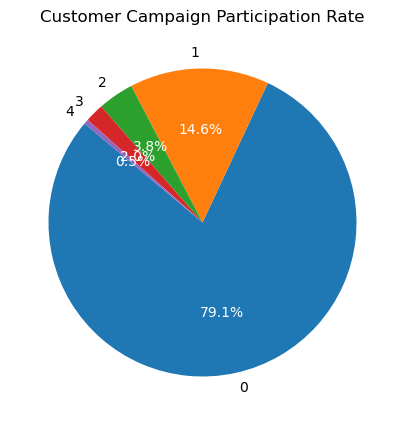

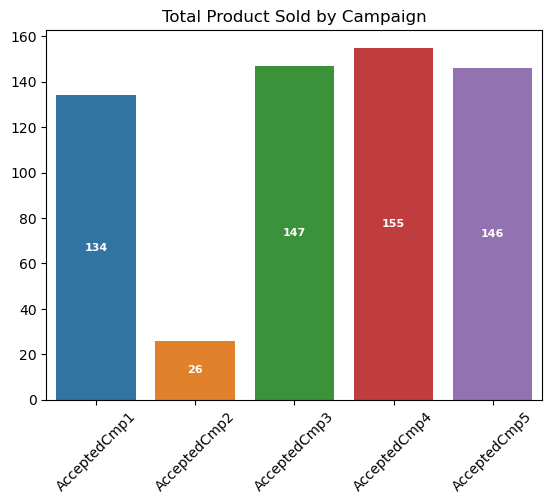

In [44]:
# Creating a pie chart 
plt.figure(figsize=(5, 5))
colors = sns.color_palette("tab10", len(total_accepted_cmp_counts))

wedges, texts, autotexts = plt.pie(total_accepted_cmp_counts, labels=total_accepted_cmp_counts.index, colors=colors, 
                                   autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('white')

plt.title('Customer Campaign Participation Rate')
plt.show()

# Creating a barplot chart
df_promotion = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

plots = sns.barplot(data=df_promotion,ci=0,estimator=np.sum)

for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()
        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')


plt.title('Total Product Sold by Campaign')
plt.xticks(rotation=45)
plt.show()

**Observasi:**
- Dari pie chart 'Customer Campaign Participation Rate', hampir 80% customer (4 dari 5) tidak pernah mengikuti campaign sekalipun dalam 2 tahun.
- Tingkat partisipasi mengikuti campaign sangat rendah. Sebagian besar yang mengkikuti campaign, hanya mengikuti 1 kali

- Campaign 4 memiliki tingkat kebeberhasilan tertinggi dibandingkan Campaign lainya, sementara Campaign 2 memiliki tingkat kebeberhasilan terendah dibandingkan Campaign lainya.

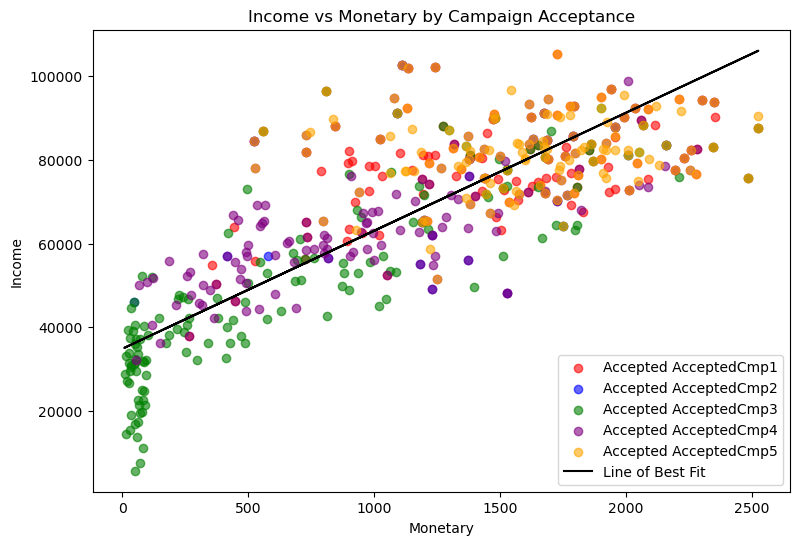

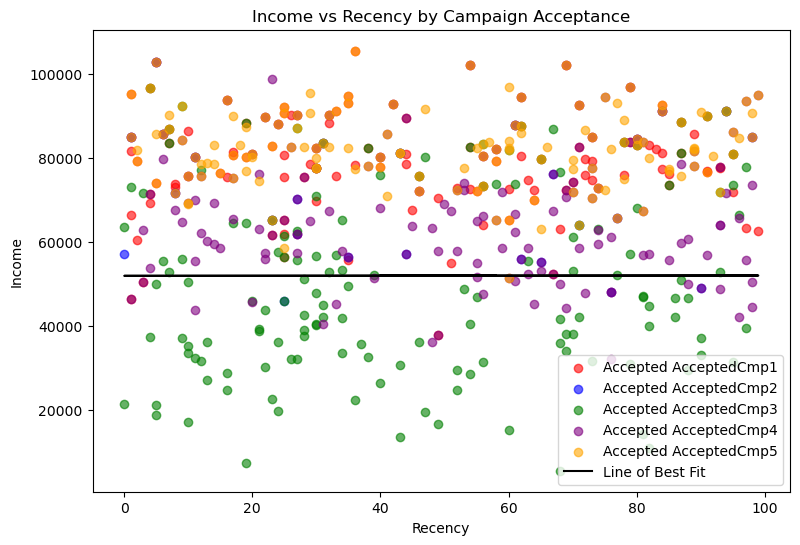

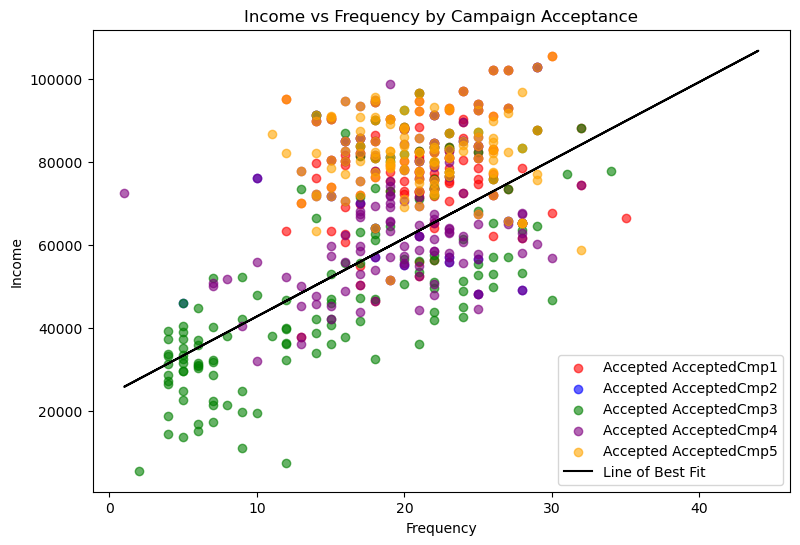

In [6]:
# Add observations with different hues for each campaign acceptance
hue_vars = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Fit the linear regression model for SCATTERPLOT 1: Income vs Monetary
reg1 = LinearRegression().fit(df[['Monetary']], df['Income'])
df['bestfit1'] = reg1.predict(df[['Monetary']])

plt.figure(figsize=(9, 6))
for hue, color in zip(hue_vars, colors):
    filtered_df = df[df[hue] == 1]
    plt.scatter(filtered_df['Monetary'], filtered_df['Income'], label=f'Accepted {hue}', color=color, alpha=0.6)
plt.plot(df['Monetary'], df['bestfit1'], color='black', label='Line of Best Fit')
plt.xlabel('Monetary')
plt.ylabel('Income')
plt.title('Income vs Monetary by Campaign Acceptance')
plt.legend()
plt.show()

# Fit the linear regression model for SCATTERPLOT 2: Income vs Recency
reg2 = LinearRegression().fit(df[['Recency']], df['Income'])
df['bestfit2'] = reg2.predict(df[['Recency']])

plt.figure(figsize=(9, 6))
for hue, color in zip(hue_vars, colors):
    filtered_df = df[df[hue] == 1]
    plt.scatter(filtered_df['Recency'], filtered_df['Income'], label=f'Accepted {hue}', color=color, alpha=0.6)
plt.plot(df['Recency'], df['bestfit2'], color='black', label='Line of Best Fit')
plt.xlabel('Recency')
plt.ylabel('Income')
plt.title('Income vs Recency by Campaign Acceptance')
plt.legend()
plt.show()

# Fit the linear regression model for SCATTERPLOT 3: Income vs Frequency
reg3 = LinearRegression().fit(df[['Frequency']], df['Income'])
df['bestfit3'] = reg3.predict(df[['Frequency']])

plt.figure(figsize=(9, 6))
for hue, color in zip(hue_vars, colors):
    filtered_df = df[df[hue] == 1]
    plt.scatter(filtered_df['Frequency'], filtered_df['Income'], label=f'Accepted {hue}', color=color, alpha=0.6)
plt.plot(df['Frequency'], df['bestfit3'], color='black', label='Line of Best Fit')
plt.xlabel('Frequency')
plt.ylabel('Income')
plt.title('Income vs Frequency by Campaign Acceptance')
plt.legend()
plt.show()


### Insights untuk Setiap Kampanye

### Income vs Monetary by Campaign Acceptance
- **Observasi**: Scatterplot ini menunjukkan hubungan antara pendapatan (Income) dan pengeluaran (Monetary) dengan warna yang berbeda untuk setiap kampanye yang diterima. Pelanggan yang menerima kampanye tertentu cenderung memiliki pengeluaran yang lebih tinggi, terutama terlihat pada kampanye AcceptedCmp1 (merah) dan AcceptedCmp2 (biru). Sebagian besar titik data terkonsentrasi di sekitar nilai pengeluaran yang lebih rendah, menunjukkan bahwa banyak pelanggan yang mengeluarkan jumlah yang relatif sedikit.

### Income vs Recency by Campaign Acceptance
- **Observasi**: Scatterplot ini menunjukkan hubungan antara pendapatan (Income) dan jumlah hari sejak pembelian terakhir (Recency) dengan warna yang berbeda untuk setiap kampanye yang diterima. Tidak ada pola yang jelas yang menunjukkan hubungan antara pendapatan dan recency, karena titik data tersebar secara acak. Pelanggan yang menerima kampanye memiliki distribusi recency yang bervariasi, tetapi tidak ada korelasi yang kuat dengan pendapatan mereka.

### Income vs Frequency by Campaign Acceptance
- **Observasi**: Scatterplot ini menunjukkan hubungan antara pendapatan (Income) dan frekuensi pembelian (Frequency) dengan warna yang berbeda untuk setiap kampanye yang diterima. Ada korelasi positif yang jelas antara frekuensi pembelian dan pendapatan, dengan garis regresi menunjukkan tren positif. Pelanggan yang lebih sering membeli cenderung memiliki pendapatan yang lebih tinggi, terutama terlihat pada kampanye AcceptedCmp1 (merah) dan AcceptedCmp3 (hijau).Pelanggan dengan frekuensi pembelian yang lebih tinggi cenderung menerima lebih banyak kampanye, menunjukkan bahwa kampanye mungkin lebih efektif untuk pelanggan dengan pendapatan tinggi.

### Tren Kampanye 1-5

- **Kampanye 1**: Pelanggan yang menerima Kampanye 1 memiliki tingkat pendapatan dan pengeluaran moneter yang beragam.Kampanye ini tampaknya berhasil menjangkau demografi yang luas, menunjukkan daya tarik yang luas. Tidak ada konsentrasi yang jelas baik pada pelanggan dengan pengeluaran tinggi maupun rendah.

- **Kampanye 2**: Mirip dengan Kampanye 1, pelanggan yang menerima Kampanye 2 juga memiliki variasi tingkat pendapatan dan pengeluaran. Kampanye 2 efektif dalam menargetkan audiens yang luas. Namun, kampanye ini tidak secara signifikan menarik pelanggan dengan pendapatan tinggi dibandingkan dengan yang berpendapatan rendah.

- **Kampanye 3**: Pelanggan yang menerima Kampanye 3 menunjukkan sedikit lebih banyak pemusatan pada pendapatan dan pengeluaran yang kecil.Kampanye ini mungkin lebih menarik bagi pelanggan dengan pendapatan menengah ke bawah, menunjukkan fokus potensial pada penawaran atau insentif yang lebih terjangkau.

- **Kampanye 4**: Penerima Kampanye 4 menunjukkan penyebaran yang jelas di berbagai tingkat pendapatan namun sedikit pemusatan pada pengeluaran yang lebih tinggi. Kampanye 4 tampaknya efektif dalam menarik pelanggan yang bersedia mengeluarkan lebih banyak. Ini mungkin menunjukkan promosi produk atau layanan bernilai tinggi yang sukses.

- **Kampanye 5**: Pelanggan yang menerima Kampanye 5 tersebar di berbagai tingkat pendapatan namun menunjukkan sedikit tren ke arah pengeluaran moneter yang lebih tinggi. Mirip dengan Kampanye 4, kampanye ini juga tampaknya menarik pelanggan dengan pengeluaran tinggi. Ini mungkin menunjukkan fokus pada program loyalitas atau promosi bernilai tinggi.



Dari ketiga scatterplot, dapat disimpulkan bahwa pengeluaran (Monetary) dan frekuensi pembelian (Frequency) memiliki korelasi positif dengan pendapatan (Income), sementara recency tidak menunjukkan korelasi yang signifikan.
Kampanye 1 dan 5 tampaknya lebih efektif menarik pelanggan dengan pengeluaran tinggi dibandingkan kampanye lainnya. Untuk kampanye di masa depan, pertimbangkan untuk memanfaatkan strategi dari Kampanye 1 dan 5 untuk menargetkan pelanggan bernilai tinggi. Selain itu, analisis lebih lanjut dapat membantu menyesuaikan kampanye secara lebih spesifik dengan kebiasaan pengeluaran dan tingkat pendapatan dari segmen pelanggan yang berbeda. Sementara itu, Kampanye 3 lebih efektif menarik pelanggan dengan income rendah, dan Kampanye 4 lebih efektif menarik pelanggan dengan income sedang.  

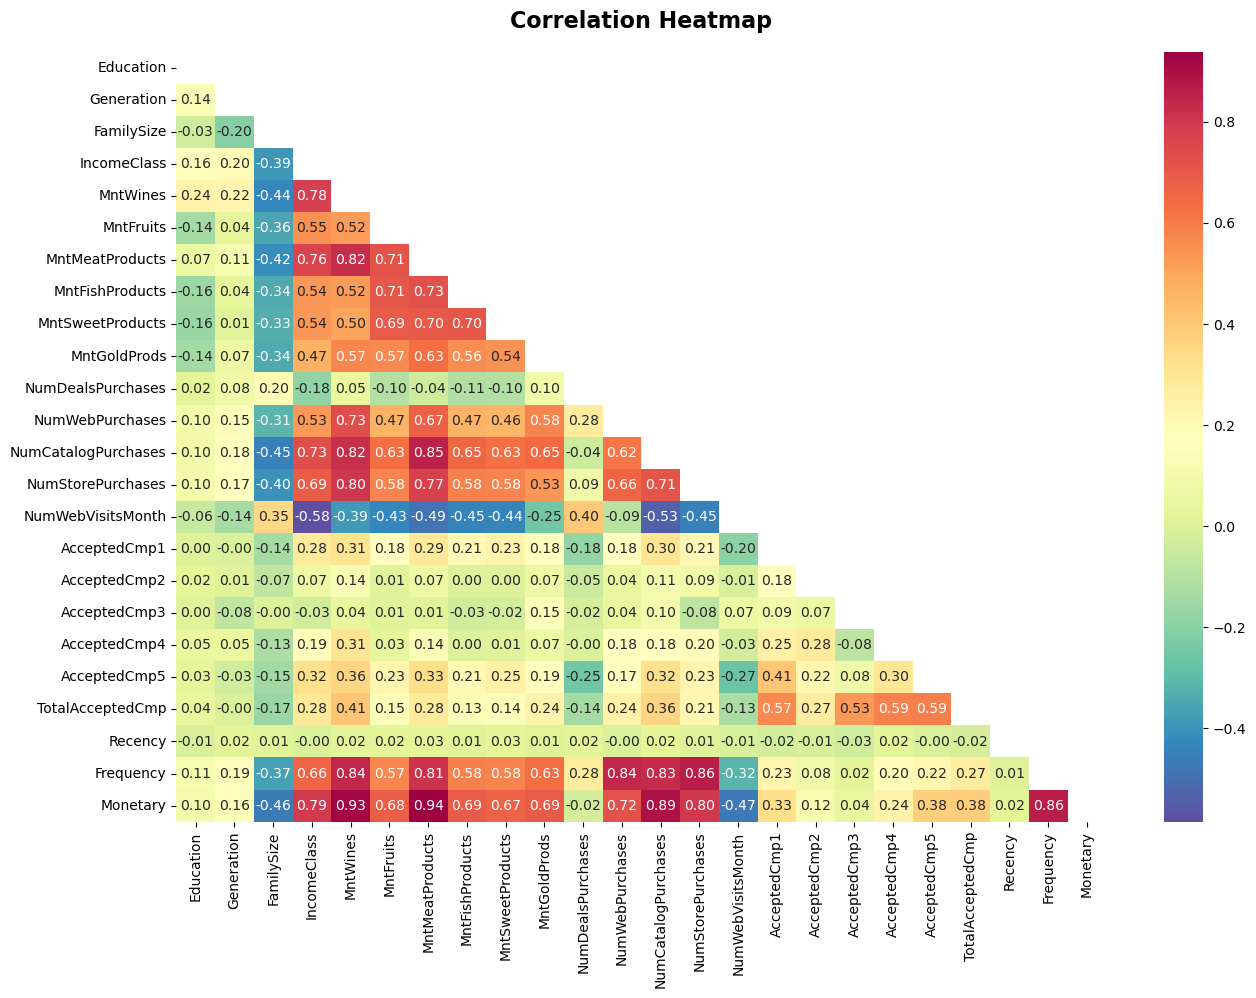

In [7]:
# Definisikan pemetaan untuk kolom Education, Generation, dan IncomeClass
education_mapping = {'Basic': 0, 'Undergraduate': 1, 'PostGraduate': 2, 'PhD': 3}
generation_mapping = {'Millennials': 0, 'Gen X': 1, 'Baby Boomers': 2, 'Silent Gen': 3}
income_class_mapping = {'Lower Class': 0, 'Lower Middle Class': 1, 'Middle Class': 2, 'Upper Middle Class': 3, 'Upper Class': 4}

# Mapping the columns manually
df['Education'] = df['Education'].map(education_mapping)
df['Generation'] = df['Generation'].map(generation_mapping)
df['IncomeClass'] = df['IncomeClass'].map(income_class_mapping)

# Tambahkan kolom FamilySize
df['FamilySize'] = df['Adulthome'] + df['Kidhome']

# Pilih kolom yang relevan untuk heatmap
df_encoded_1 = df[['Education', 'Generation', 'FamilySize', 'IncomeClass',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 
                   'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                   'TotalAcceptedCmp', 'Recency', 'Frequency','Monetary']]

# Buat heatmap korelasi
mask = np.triu(np.ones_like(df_encoded_1.corr(), dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded_1.corr(method='spearman'), cmap='Spectral_r', annot=True, fmt='.2f', mask=mask)
plt.title('Correlation Heatmap', fontsize=16, y=1.02, fontweight='bold')
plt.show()


### Insight terhadap Correlation Heatmap

#### Korelasi antara Promo dengan Platform
- **NumDealsPurchases dan NumWebPurchases**: Ada korelasi positif yang signifikan antara jumlah pembelian dengan diskon dan jumlah pembelian melalui situs web. Ini menunjukkan bahwa diskon mungkin lebih efektif untuk menarik pelanggan berbelanja secara online.
  
- **NumDealsPurchases dan NumCatalogPurchases**: Korelasi positif antara jumlah pembelian dengan diskon dan jumlah pembelian melalui katalog menunjukkan bahwa diskon juga efektif dalam mendorong pembelian melalui katalog.
  
- **NumDealsPurchases dan NumStorePurchases**: Ada korelasi positif antara jumlah pembelian dengan diskon dan jumlah pembelian di toko, menunjukkan bahwa diskon juga mempengaruhi pembelian di toko fisik.

#### Korelasi antara Promo dengan Lini Produk
- **NumDealsPurchases dan MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**:
  - **MntWines**: Pelanggan yang sering membeli dengan diskon cenderung menghabiskan lebih banyak untuk anggur. Ini menunjukkan bahwa diskon mungkin menarik pelanggan yang membeli anggur.
  - **MntFruits**: Ada korelasi positif antara jumlah pembelian dengan diskon dan pengeluaran untuk buah-buahan.
  - **MntMeatProducts**: Diskon juga berkorelasi positif dengan pengeluaran untuk produk daging.
  - **MntFishProducts**: Pelanggan yang membeli dengan diskon cenderung menghabiskan lebih banyak untuk produk ikan.
  - **MntSweetProducts**: Diskon berkorelasi positif dengan pengeluaran untuk produk permen.
  - **MntGoldProds**: Ada korelasi positif antara pembelian dengan diskon dan pengeluaran untuk produk emas.

### Strategi:
- **Strategi Diskon Multichannel**: Diskon efektif di semua saluran (online, katalog, dan toko fisik). Perusahaan dapat mempertimbangkan untuk menawarkan diskon yang konsisten di semua saluran untuk memaksimalkan penjualan.
  
- **Promosi Produk Spesifik**: Diskon sangat efektif dalam meningkatkan pengeluaran untuk berbagai lini produk, termasuk anggur, buah-buahan, produk daging, ikan, permen, dan produk emas. Promosi yang dirancang untuk produk-produk ini dapat meningkatkan penjualan secara signifikan.

- **Segmentasi Pelanggan**: Menargetkan pelanggan yang sensitif terhadap diskon di berbagai platform dapat meningkatkan keterlibatan dan loyalitas pelanggan. Segmentasi lebih lanjut dapat dilakukan berdasarkan lini produk yang mereka beli dengan diskon.

## Problem 3: Bagaimana SUPER-MART dapat memberikan pelayanan dan promo yang tepat bagi berbagai tipe customer demi meningkatkan profit?

Pola transaksi pelanggan dapat diungkap melalui **analisis RFM**, yang mengacu pada tiga faktor kunci: `Recency` (seberapa baru pelanggan melakukan pembelian), `Frequency` (seberapa sering pelanggan melakukan pembelian), dan `Monetary` (berapa banyak uang yang dihabiskan pelanggan). Analisis RFM ini membantu dalam **memahami tingkat keterlibatan** dan **mengidentifikasi segmentasi** yang berpotensi untuk perbaikan penjualan.

In [10]:
def get_RFM_score(dataframe):
    dataframe["R"] = pd.qcut(dataframe["Recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["F"] = pd.qcut(dataframe["Frequency"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["M"] = pd.qcut(dataframe["Monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_SCORE"] = dataframe["R"].astype(str) + dataframe["F"].astype(str)
    return dataframe

df = get_RFM_score(df)

seg_map = {
    r'[1-2][1-2]': 'lost',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

df['Customer_type'] = df['RFM_SCORE'].replace(seg_map, regex = True)
df


,ID,Year_Birth,Generation,Education,Income,IncomeClass,Marital_Status,Adulthome,Kidhome,Teenhome,FamilySize,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalAcceptedCmp,Response,Dt_Customer,Complain,preferredPlatform,Recency,Frequency,Monetary,bestfit1,bestfit2,bestfit3,R,F,M,RFM_SCORE,Customer_type
0,5524,1957,2,1.0,58138.0,2,Single,1,0,0,1,635,88,546,172,88,88,3,8,10,...,0,0,0,0,0,1,2012-09-04,0,Catalog,58,25,1617,80490.522863,52010.381302,70965.480112,3,5,5,35,loyal_customers
1,2174,1954,2,1.0,46344.0,1,Single,1,1,1,2,11,1,6,2,1,6,2,1,1,...,0,0,0,0,0,0,2014-03-08,0,Store,38,6,27,35577.228716,51996.344740,35246.199673,4,1,1,41,promising
2,4141,1965,1,1.0,71613.0,2,Partnered,2,0,0,2,426,49,127,111,21,42,1,8,2,...,0,0,0,0,0,0,2013-08-21,0,Store,26,21,776,56734.497468,51987.922803,63445.631599,4,4,4,44,loyal_customers
3,6182,1984,0,1.0,26646.0,0,Partnered,2,1,0,3,11,4,20,10,3,5,2,2,0,...,0,0,0,0,0,0,2014-02-10,0,Store,26,8,53,36311.659941,51987.922803,39006.123930,4,2,1,42,potential_loyalists
4,5324,1981,0,3.0,58293.0,2,Partnered,2,1,0,3,173,43,118,46,27,15,5,5,3,...,0,0,0,0,0,0,2014-01-19,0,Store,94,19,422,46734.933866,52035.647113,59685.707342,1,4,3,14,at_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,8080,1986,0,1.0,26816.0,0,Single,1,0,0,1,5,1,6,3,4,3,1,0,0,...,0,0,0,0,0,0,2012-08-17,0,Store,50,4,22,35435.991942,52004.766677,31486.275417,3,1,1,31,about_to_sleep
2019,10870,1967,1,1.0,61223.0,2,Partnered,2,0,1,2,709,43,182,42,118,247,2,9,3,...,0,0,0,0,0,0,2013-06-13,0,Web,46,18,1341,72694.252935,52001.959365,57805.745214,3,4,5,34,loyal_customers
2020,7270,1981,0,1.0,56981.0,1,Single,1,0,0,1,908,48,217,32,12,24,1,2,3,...,0,0,1,0,1,0,2014-01-25,0,Store,91,19,1241,69869.517454,52033.541628,59685.707342,1,4,5,14,at_Risk
2021,8235,1956,2,NaN,69245.0,2,Partnered,2,0,1,2,428,30,214,80,30,61,2,6,5,...,0,0,0,0,0,0,2014-01-24,0,Store,8,23,843,58627.070240,51975.289898,67205.555856,5,5,4,55,champions


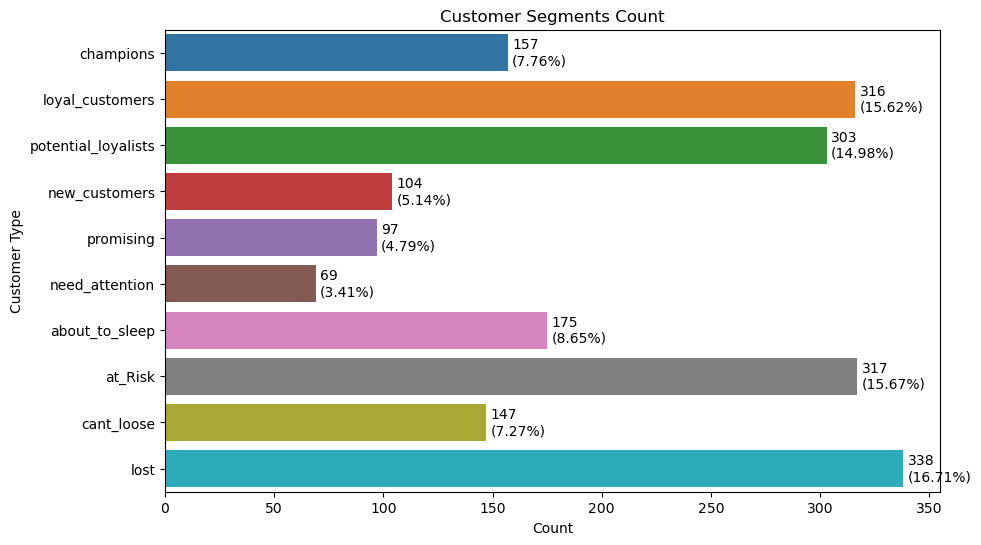

In [11]:
cust_type = ['champions','loyal_customers','potential_loyalists','new_customers','promising','need_attention','about_to_sleep','at_Risk','cant_loose','lost']

# Create the countplot with annotations
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df, y="Customer_type", order=cust_type, palette='tab10')

# Annotate with counts and percentages
total = len(df)
for p in plot.patches:
    count = int(p.get_width())
    percentage = f'{count / total * 100:.2f}%'
    plot.annotate(f'{count}\n({percentage})', 
                  (p.get_width() + 2, p.get_y() + p.get_height() / 2),
                  ha='left', va='center',)

plt.title('Customer Segments Count')
plt.xlabel('Count')
plt.ylabel('Customer Type')
plt.show()


### Insight dari Segmen RFM

| Segment            | Persentase | Karakteristik                                                                                                                                     | Strategi                                                                                               |
|--------------------|------------|---------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Champions          | 7.76%      | Pelanggan ini melakukan pembelian baru-baru ini, sering bertransaksi, dan memiliki nilai pembelian tinggi.                                        | Pertahankan mereka dengan memberikan penghargaan, penawaran eksklusif, dan program loyalitas.          |
| Loyal Customers    | 15.62%     | Pelanggan yang sering bertransaksi dengan nilai yang konsisten.                                                                                   | Berikan mereka program loyalitas, undang mereka untuk acara khusus, dan teruskan komunikasi yang baik. |
| Potential Loyalists| 14.98%     | Pelanggan ini sering bertransaksi tetapi mungkin belum lama menjadi pelanggan.                                                                    | Dorong mereka untuk tetap setia dengan memberikan pengalaman berbelanja yang baik dan promosi khusus.  |
| New Customers      | 5.14%      | Pelanggan baru yang belum menunjukkan pola pembelian yang konsisten.                                                                              | Fokus pada onboarding yang baik, penawaran selamat datang, dan tunjukkan nilai produk/jasa Anda.       |
| Promising          | 4.79%      | Pelanggan yang menunjukkan potensi untuk menjadi lebih loyal di masa depan.                                                                       | Teruskan pendekatan dengan promosi yang relevan dan komunikasi yang menarik.                                |
| Need Attention     | 3.41%      | Pelanggan ini pernah aktif tetapi aktivitasnya mulai menurun.                                                                                     | Lakukan survei untuk memahami alasan penurunan aktivitas, berikan penawaran yang menarik untuk mengaktifkan kembali mereka. |
| About to Sleep     | 8.65%      | Pelanggan ini hampir tidak aktif dan mungkin akan berhenti berbelanja.                                                                            | Kirim pengingat, promosi khusus, atau insentif untuk mendorong mereka kembali berbelanja.              |
| At Risk            | 15.67%     | Pelanggan ini menunjukkan tanda-tanda akan meninggalkan perusahaan, dengan frekuensi pembelian yang menurun.                                      | Segera hubungi mereka dengan penawaran menarik atau diskon besar untuk mencegah churn.                 |
| Can't Lose         | 7.27%      | Pelanggan berharga tinggi yang menunjukkan tanda-tanda akan berhenti berbelanja.                                                                  | Fokuskan upaya retensi dengan penawaran personal, layanan pelanggan yang sangat baik, dan program loyalitas yang menarik. |
| Lost               | 16.71%     | Pelanggan ini sudah lama tidak bertransaksi, frekuansi dan nilai transaksi juga sangat rendah.                                                                       | Tidak ada yang perlu diperbuat pada segmen ini.      |

#### Observasi:
- **Fokus pada Retensi**: Segmen seperti **"Loyal Customers"**, **"Champions"**, dan **"Potential Loyalists"** memiliki potensi jangka panjang yang besar dan harus dipertahankan dengan strategi yang tepat.
- **Aktivasi Kembali Pelanggan**: Pelanggan di segmen **"Hibernating"** dan **"About to Sleep"** membutuhkan kampanye re-engagement untuk mengaktifkan kembali mereka.
- **Pencegahan Churn**: Segmen **"At Risk"** dan **"Need Attention"** perlu segera ditangani untuk mencegah kehilangan pelanggan.


## **Kesimpulan dan Rekomendasi** 

### Problem 1: Seperti apa demografi dan preferensi tiap segment customer untuk menyempurnakan strategi pemasaran yang tepat dan mendorong pengalaman belanja yang personal?
#### Kesimpulan
- Mayoritas pelanggan memiliki pendidikan sarjana, berasal dari Generasi X dan Millennials, serta berada dalam kelas menengah dengan status pernikahan berpasangan. Mereka lebih suka berbelanja di toko fisik, dan kebanyakan berasal dari keluarga kecil dengan 2-3 anggota. Pelanggan dengan pendidikan sarjana dan Gen X melakukan pembelian terbanyak di semua saluran, sedangkan pelanggan dari Generasi Millennials menunjukkan preferensi belanja yang signifikan di toko fisik. Kelas menengah mendominasi semua saluran pembelian, dengan pasangan dan individu single sebagai segmen utama. Kampanye pemasaran yang menargetkan kelompok-kelompok ini dengan pendekatan yang sesuai dapat meningkatkan keterlibatan dan penjualan secara signifikan.

#### Rekomendasi
- Strategi pemasaran dapat difokuskan pada Gen X dan Millennials, dengan penekanan pada pengalaman berbelanja di toko fisik dan promosi yang sesuai dengan kelas menengah. Personalisasi pengalaman belanja dengan menggunakan data demografi untuk mengirimkan rekomendasi produk yang relevan. Integrasi omnichannel yang mulus memastikan pengalaman belanja yang konsisten di semua saluran. Selain itu, lakukan promosi tersegmentasi berdasarkan demografi dan preferensi pelanggan melalui email marketing, media sosial, dan promosi di toko fisik untuk menjangkau berbagai segmen dengan cara yang paling efektif. Penawaran khusus untuk keluarga kecil dan program loyalitas dapat meningkatkan keterlibatan pelanggan dan mendorong penjualan.

### Problem 2: Seberapa efektif kampanye-kampanye sebelumnya dalam menarik pelanggan dan meningkatkan penjualan?
#### Kesimpulan
- Kampanye pemasaran sebelumnya kurang efektif dalam menarik pelanggan dan meningkatkan penjualan, dengan hampir 80% pelanggan tidak pernah mengikuti kampanye dalam dua tahun terakhir dan sebagian besar dari yang mengikuti hanya melakukannya satu kali. Dari lima kampanye yang dianalisis, Kampanye 4 memiliki tingkat keberhasilan tertinggi, sedangkan Kampanye 2 memiliki tingkat keberhasilan terendah. Analisis scatterplot menunjukkan korelasi positif antara pendapatan dan pengeluaran serta frekuensi pembelian, sementara tidak ada korelasi signifikan dengan recency. Kampanye 1 dan 5 efektif dalam menarik pelanggan dengan pengeluaran tinggi, sedangkan Kampanye 3 lebih menarik bagi pelanggan dengan pendapatan rendah dan Kampanye 4 bagi pelanggan dengan pendapatan sedang.

#### Rekomendasi
- Untuk meningkatkan efektivitas kampanye pemasaran, fokuskan pada strategi dari Kampanye 1 dan 5 yang berhasil menarik pelanggan dengan pengeluaran tinggi. Gunakan strategi diskon multichannel yang konsisten di semua saluran (online, katalog, dan toko fisik) untuk meningkatkan penjualan. Promosikan produk spesifik seperti anggur, buah-buahan, produk daging, ikan, permen, dan produk emas dengan diskon untuk meningkatkan pengeluaran pelanggan. Segmentasi lebih lanjut berdasarkan sensitivitas pelanggan terhadap diskon dan lini produk yang dibeli dapat meningkatkan keterlibatan dan loyalitas pelanggan. Meningkatkan partisipasi kampanye dengan pendekatan yang lebih personal dan berbasis data juga akan membantu mengoptimalkan hasil.

### Problem 3: Bagaimana SUPER-MART dapat memberikan pelayanan dan promo yang tepat bagi berbagai tipe customer demi meningkatkan profit?

#### Kesimpulan
- SUPER-MART dapat meningkatkan profit dengan memberikan pelayanan dan promo yang tepat kepada berbagai tipe pelanggan berdasarkan segmen RFM (Recency, Frequency, Monetary). Segmen "Champions" dan "Loyal Customers" memiliki potensi jangka panjang yang besar dan perlu dipertahankan dengan program loyalitas dan penawaran eksklusif. "Potential Loyalists" dan "Promising" menunjukkan potensi untuk menjadi lebih loyal dan membutuhkan pengalaman belanja yang memuaskan serta promosi khusus. Pelanggan "At Risk" dan "Can't Lose" menunjukkan tanda-tanda akan berhenti berbelanja dan memerlukan penawaran menarik serta layanan pelanggan yang personal untuk mencegah churn. Segmen "New Customers" membutuhkan onboarding yang baik dan penawaran selamat datang, sementara pelanggan "Need Attention" dan "About to Sleep" memerlukan survei dan insentif untuk kembali berbelanja.

#### Rekomendasi
- Untuk mempertahankan segmen "Champions" dan "Loyal Customers", berikan penghargaan, penawaran eksklusif, dan program loyalitas yang menarik. Dorong "Potential Loyalists" dan "Promising" untuk tetap setia dengan pengalaman belanja yang baik dan promosi khusus. Fokus pada "New Customers" dengan onboarding yang baik dan penawaran selamat datang yang menarik. Untuk mengaktifkan kembali pelanggan "Need Attention" dan "About to Sleep", kirimkan survei untuk memahami alasan penurunan aktivitas dan berikan penawaran menarik. Segera tangani segmen "At Risk" dan "Can't Lose" dengan penawaran menarik, diskon besar, dan layanan pelanggan yang personal untuk mencegah churn. Dengan strategi-strategi ini, SUPER-MART dapat meningkatkan retensi pelanggan dan profit secara keseluruhan.
